The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [26]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


# Start coding here!

# Reading in the Nobel Prize data
nobel_df = pd.read_csv("data/nobel.csv")
nobel_df.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [27]:
# Store your answers as string variables top_gender and top_country.
top_gender = nobel_df["sex"].value_counts().idxmax()
top_country = nobel_df["birth_country"].value_counts().idxmax()

print (top_gender)
print (top_country)

Male
United States of America


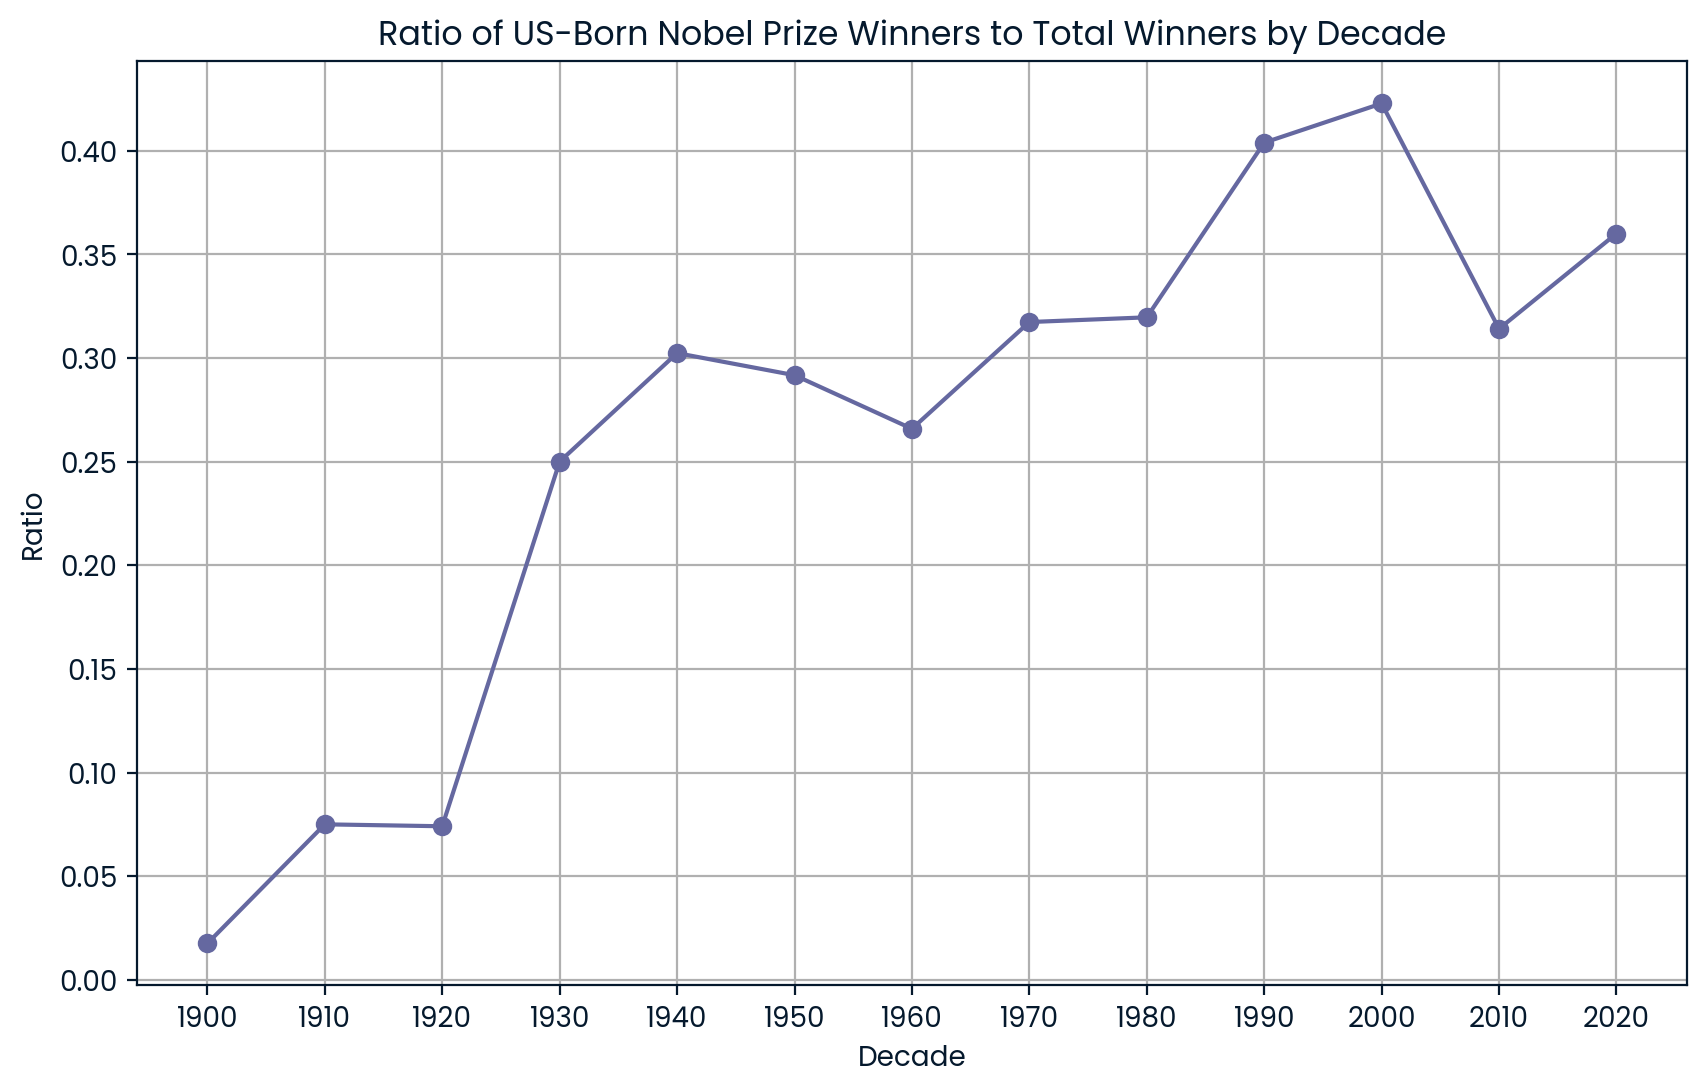

Decade with the highest ratio of US-born Nobel Prize winners to total winners: 2000


In [28]:
# Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?

# Create a column indicating whether the winner was born in the United States
nobel_df['us_born'] = nobel_df['birth_country'] == 'United States of America'

# Convert 'year' column to numeric type
nobel_df['year'] = pd.to_numeric(nobel_df['year'], errors='coerce')

# Create a column to represent the decade of the Nobel Prize
nobel_df['decade'] = (nobel_df['year'] // 10) * 10

# Group the data by decade and calculate the ratio of US-born winners to total winners for each decade
decade_ratios = nobel_df.groupby('decade')['us_born'].mean()

# Identify the decade with the highest ratio of US-born winners
max_decade_usa = decade_ratios.idxmax()

# Plot the trend of the ratio over decades
decade_ratios.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Ratio of US-Born Nobel Prize Winners to Total Winners by Decade')
plt.xlabel('Decade')
plt.ylabel('Ratio')
plt.grid(True)
plt.xticks(decade_ratios.index)
plt.show()

print("Decade with the highest ratio of US-born Nobel Prize winners to total winners:", max_decade_usa)


In [29]:
# Which decade and Nobel Prize category combination had the highest proportion of female laureates?
female_laureates_per_decade = nobel_df[nobel_df['sex'] == 'Female'].groupby(['decade', 'category']).size()
total_laureates_per_decade = nobel_df.groupby(['decade', 'category']).size()
female_ratio_per_decade = female_laureates_per_decade / total_laureates_per_decade
max_female_dict = {female_ratio_per_decade.idxmax()[0]: female_ratio_per_decade.idxmax()[1]}

In [30]:
# Who was the first woman to receive a Nobel Prize, and in what category?
first_woman = nobel_df[nobel_df['sex'] == 'Female'].sort_values('year').iloc[0]
first_woman_name = first_woman['full_name']
first_woman_category = first_woman['category']

In [31]:
# Which individuals or organizations have won more than one Nobel Prize throughout the years?
repeat_list = nobel_df['full_name'].value_counts()[nobel_df['full_name'].value_counts() > 1].index.tolist()

In [32]:
# Printing the results
print("Most commonly awarded gender:", top_gender)
print("Most commonly awarded birth country:", top_country)
print("Decade with the highest ratio of US-born Nobel Prize winners:", max_decade_usa)
print("Decade and Nobel Prize category with the highest proportion of female laureates:", max_female_dict)
print("First woman to receive a Nobel Prize:", first_woman_name, "in category:", first_woman_category)
print("Individuals or organizations that have won more than one Nobel Prize:", repeat_list)

Most commonly awarded gender: Male
Most commonly awarded birth country: United States of America
Decade with the highest ratio of US-born Nobel Prize winners: 2000
Decade and Nobel Prize category with the highest proportion of female laureates: {2020: 'Literature'}
First woman to receive a Nobel Prize: Marie Curie, née Sklodowska in category: Physics
Individuals or organizations that have won more than one Nobel Prize: ['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Linus Carl Pauling', 'John Bardeen', 'Frederick Sanger', 'Marie Curie, née Sklodowska', 'Office of the United Nations High Commissioner for Refugees (UNHCR)']
